In [30]:
import pandas as pd
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

<a id = 'Data'></a>
## Get the Data

In [31]:
adult_df = pd.read_csv('A:\\Data Analysis Jupyter\\Adult-Census\\adult.csv')
print("Number of Observations in dataset:", adult_df.shape)

adult_df.head()

Number of Observations in dataset: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [32]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<a id = 'EDA'></a>
## Data Exploration and Visualization

In [34]:
#Separate categorical and numberical columns
cat_col = adult_df.dtypes[adult_df.dtypes == 'object'] # if its type object
num_col = adult_df.dtypes[adult_df.dtypes != 'object'] # if its not object

In [35]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= adult_df[col].value_counts()
    percent = adult_df[col].value_counts() / adult_df.shape[0]
    df = pd.concat([total,percent],keys = ['Total','Percent'],axis = 1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                  Total   Percent
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
?                  1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              Total   Percent
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Preschool        51  0.001566


--------------------Marital.Status--

`native.country ,occupation , workclass` has unknown values represented by `?`.

In [38]:
edit_cols = ['native.country','occupation','workclass']
# Replace '?' with 'unknown'
for col in edit_cols:
    adult_df.loc[adult_df[col] == '?', col] = 'unknown'

In [39]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {adult_df[(adult_df[col] == '?')].any().sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


Since 9th, 10th, 11th, 12th come under high school grad, group them in one attribute i.e **'HS-Grad'**. Similarly group 1st-4th, 5th-6th,7th-8th in **'Elementary-school'.**

In [41]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
adult_df['education'].replace(to_replace = hs_grad,value = 'HS-Grad',inplace = True)
adult_df['education'].replace(to_replace = elementary,value = 'Elementary-School',inplace = True)

adult_df['education'].value_counts()

HS-Grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
Elementary-School     1147
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Preschool               51
Name: education, dtype: int64

Similarly, group categories for `marital-status` into one single to reduce feature complexity.

In [42]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
adult_df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
adult_df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

adult_df['marital.status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

In [44]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
adult_df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
adult_df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

adult_df['workclass'].value_counts()



Private           22696
Govt_employees     4351
Self_employed      3657
unknown            1836
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

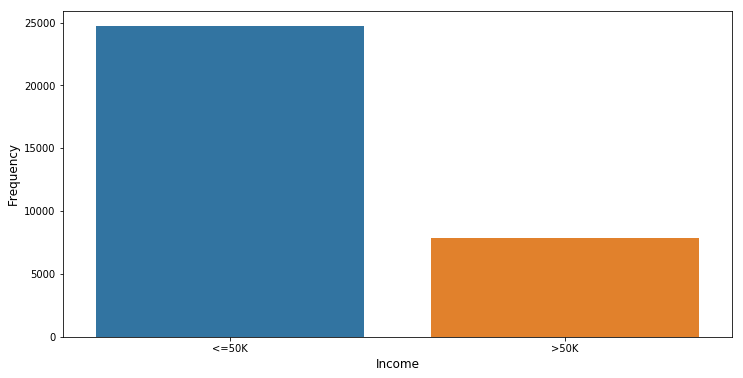

In [45]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = adult_df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

- Dataset has nearly 25000 people earning (less than) <=50K which are 75% and remainng 25% earns more than >50K.
